In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
df_new1=pd.read_csv("aerofit_treadmill.csv")
df_new1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [263]:
len(df_new1)

180

In [264]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [265]:
df_new1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [266]:
df_new1.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [267]:
df_new1["Product"]=df_new1["Product"].replace(["KP281","KP481","KP781"],["Entry_Lvl","Mid_Lvl","Adv_Lvl"])

In [268]:
df_new1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,Entry_Lvl,18,Male,14,Single,3,4,29562,112
1,Entry_Lvl,19,Male,15,Single,2,3,31836,75
2,Entry_Lvl,19,Female,14,Partnered,4,3,30699,66
3,Entry_Lvl,19,Male,12,Single,3,3,32973,85
4,Entry_Lvl,20,Male,13,Partnered,4,2,35247,47


In [269]:
def boxView(df,x,y):
    sns.boxplot(data=df_new1,x=x,y=y)
    

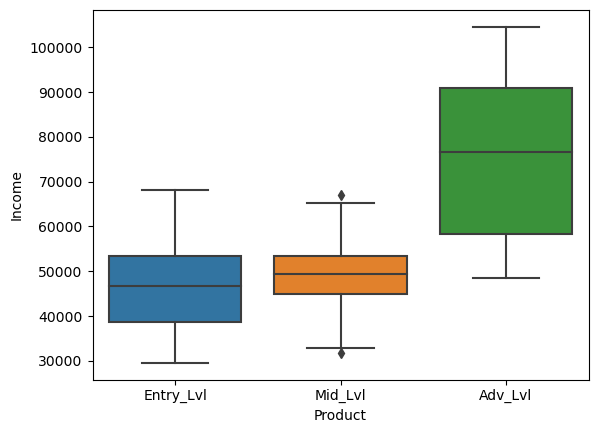

In [270]:
boxView(df_new1,'Product','Income')

<AxesSubplot:xlabel='Product', ylabel='Age'>

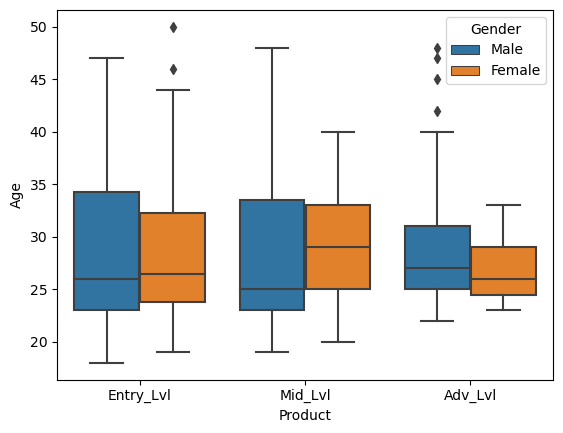

In [271]:
sns.boxplot(data=df_new1,hue='Gender',y='Age',x="Product")

<AxesSubplot:>

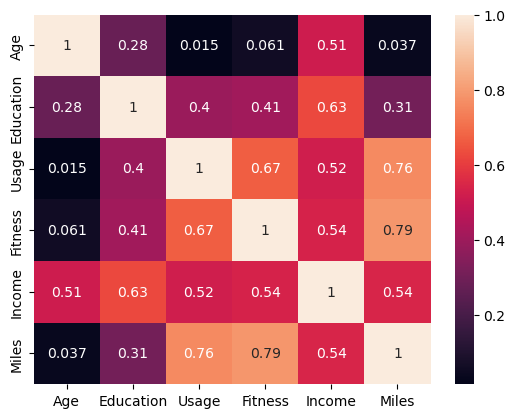

In [272]:
sns.heatmap(df_new1.corr(),annot=True)

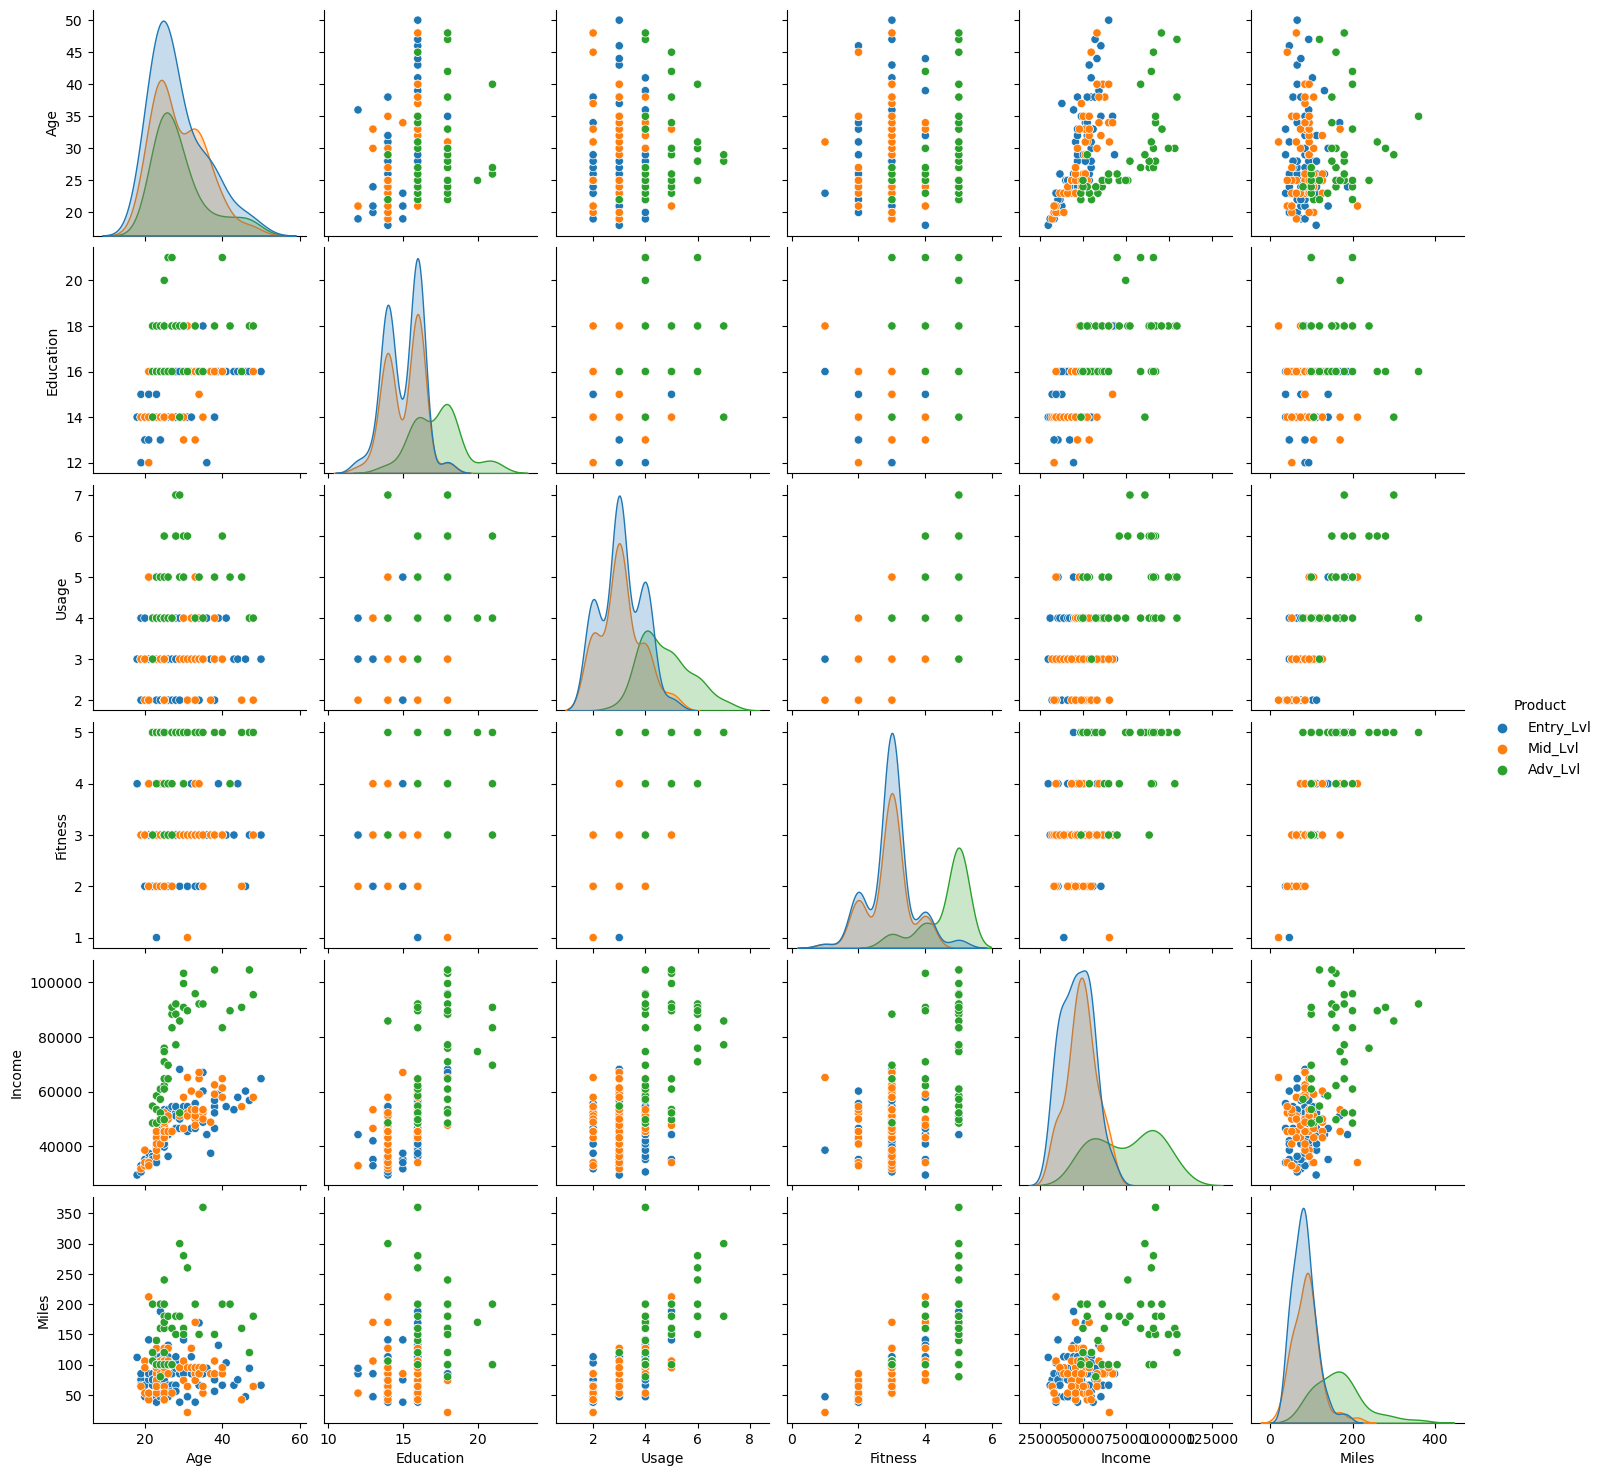

In [273]:
sns.pairplot(data=df_new1,hue='Product')

<AxesSubplot:xlabel='MaritalStatus', ylabel='Fitness'>

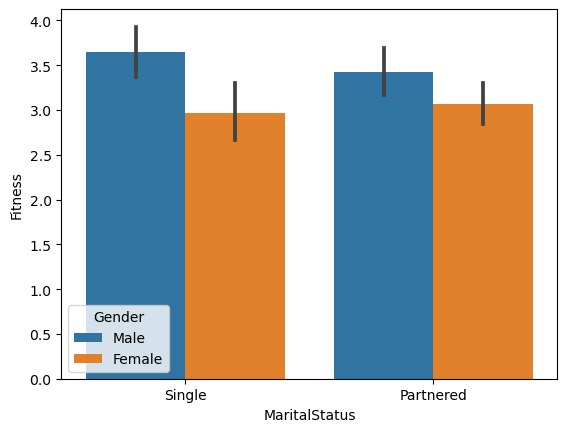

In [274]:
#Relation between Maritialstatus and fitness
sns.barplot(data=df_new1,x='MaritalStatus',y='Fitness',hue='Gender')

In [275]:
df_new1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,Entry_Lvl,18,Male,14,Single,3,4,29562,112
1,Entry_Lvl,19,Male,15,Single,2,3,31836,75
2,Entry_Lvl,19,Female,14,Partnered,4,3,30699,66
3,Entry_Lvl,19,Male,12,Single,3,3,32973,85
4,Entry_Lvl,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,Adv_Lvl,40,Male,21,Single,6,5,83416,200
176,Adv_Lvl,42,Male,18,Single,5,4,89641,200
177,Adv_Lvl,45,Male,16,Single,5,5,90886,160
178,Adv_Lvl,47,Male,18,Partnered,4,5,104581,120


<AxesSubplot:xlabel='Product', ylabel='count'>

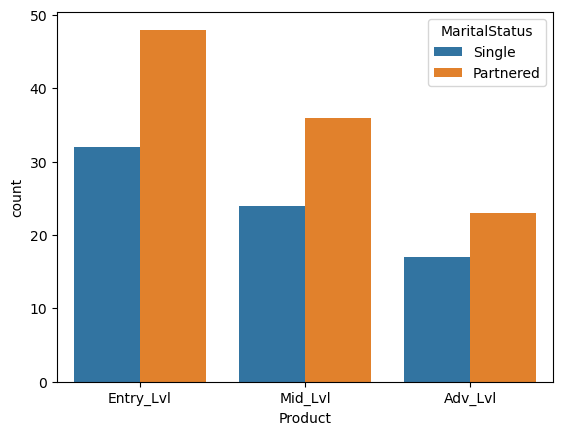

In [276]:
#Relation between Product bought and maritial status
sns.countplot(data=df_new1,x='Product',hue='MaritalStatus')

In [294]:
crsstb_g=pd.crosstab(index=df_new1['Product'],columns=df_new1['Gender'],margins=False,margins_name='Total').reset_index()
crsstb_g

Gender,Product,Female,Male
0,Adv_Lvl,7,33
1,Entry_Lvl,40,40
2,Mid_Lvl,29,31


     Product     Female       Male
0    Adv_Lvl   3.888889  18.333333
1  Entry_Lvl  22.222222  22.222222
2    Mid_Lvl  16.111111  17.222222

     Product  Gender  Probability
0    Adv_Lvl  Female     3.888889
1  Entry_Lvl  Female    22.222222
2    Mid_Lvl  Female    16.111111
3    Adv_Lvl    Male    18.333333
4  Entry_Lvl    Male    22.222222
5    Mid_Lvl    Male    17.222222


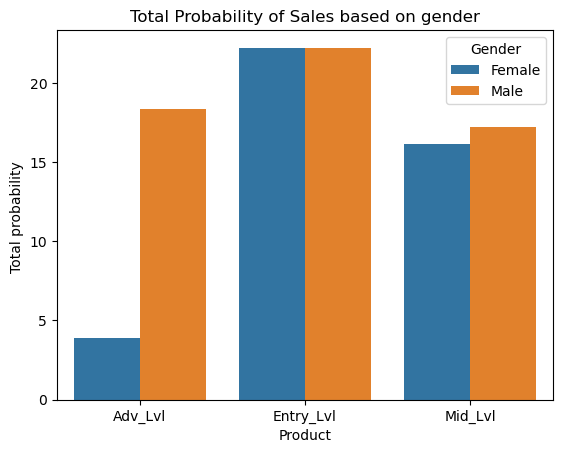

In [295]:
#Probability of Total Sales based on gender
prob_gender=(crsstb_g.iloc[:,1:]/len(df_new1))*100
prob_gender
prob_plot_data=pd.concat([crsstb_g['Product'],prob_gender],axis=1)
print(prob_plot_data)

print()
prob_plot_data_clean=pd.melt(prob_plot_data,id_vars=['Product'],var_name='Gender',value_name='Probability')
print(prob_plot_data_clean)

sns.barplot(data=prob_plot_data_clean,x='Product',y='Probability',hue='Gender')
plt.title("Total Probability of Sales based on gender")
plt.ylabel("Total probability ")
plt.show()


Gender    Product    Female      Male
0         Adv_Lvl  0.175000  0.825000
1       Entry_Lvl  0.500000  0.500000
2         Mid_Lvl  0.483333  0.516667



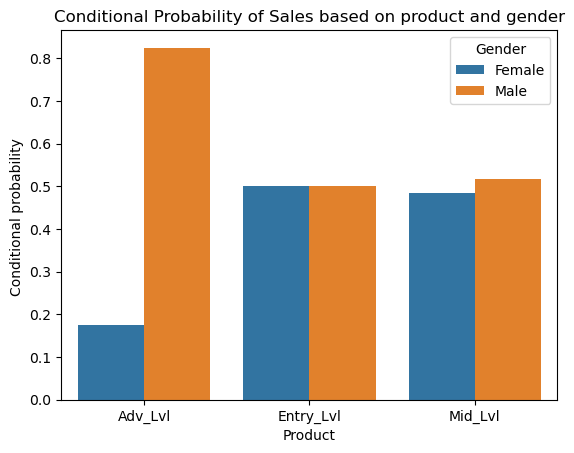

In [299]:
#Conditional probability for each product based on gender
cond_crsstb_g=pd.crosstab(index=df_new1['Product'],columns=df_new1['Gender'],margins=False,margins_name='Total',normalize='index').reset_index()
c_prob_plot_data_clean=pd.melt(cond_crsstb_g,id_vars=['Product'],var_name='Gender',value_name='Probability')
print(cond_crsstb_g)
print()
sns.barplot(data=c_prob_plot_data_clean,x='Product',y='Probability',hue='Gender')
plt.title("Conditional Probability of Sales based on product and gender")
plt.ylabel("Conditional probability ")
plt.show()

     Product  Partnered     Single
0    Adv_Lvl  12.777778   9.444444
1  Entry_Lvl  26.666667  17.777778
2    Mid_Lvl  20.000000  13.333333

     Product Marti_stat  Probability
0    Adv_Lvl  Partnered    12.777778
1  Entry_Lvl  Partnered    26.666667
2    Mid_Lvl  Partnered    20.000000
3    Adv_Lvl     Single     9.444444
4  Entry_Lvl     Single    17.777778
5    Mid_Lvl     Single    13.333333


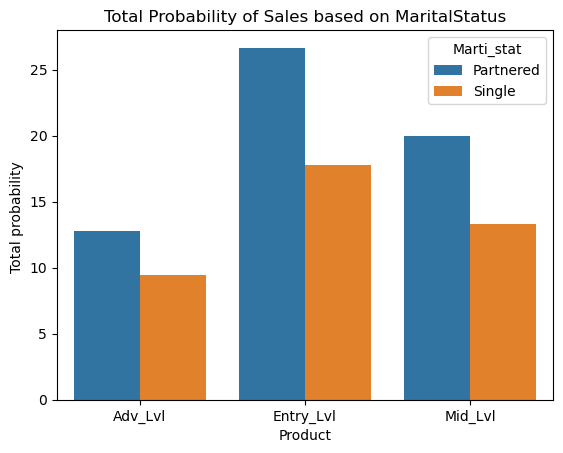

In [280]:
#Probability of Sales based on MaritalStatus
crsstb_s=pd.crosstab(index=df_new1['Product'],columns=df_new1['MaritalStatus'],margins=False).reset_index()
prob_mstatus=crsstb_s.iloc[:,1:]/len(df_new1)*100
prob_mstatus
prob_plot_data=pd.concat([crsstb_s['Product'],prob_mstatus],axis=1)
print(prob_plot_data)
print()
prob_plot_data_clean=pd.melt(prob_plot_data,id_vars=['Product'],var_name='Marti_stat',value_name='Probability')
print(prob_plot_data_clean)

sns.barplot(data=prob_plot_data_clean,x='Product',y='Probability',hue='Marti_stat')
plt.title("Total Probability of Sales based on MaritalStatus")
plt.ylabel("Total probability ")
plt.show()

MaritalStatus    Product  Partnered  Single
0                Adv_Lvl      0.575   0.425
1              Entry_Lvl      0.600   0.400
2                Mid_Lvl      0.600   0.400


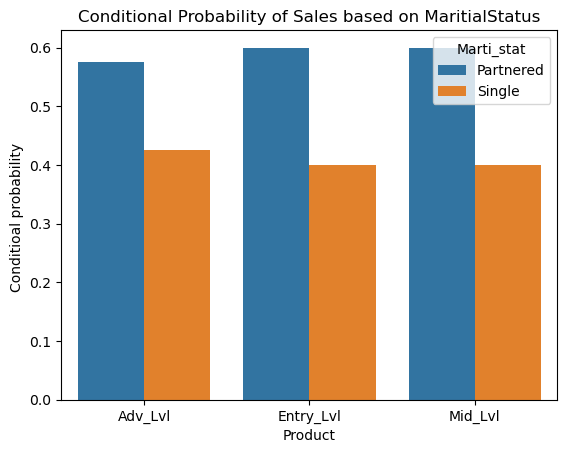

In [298]:
#Conditional prob for each prodcut based on Martitals status
cond_crsstb_g=pd.crosstab(index=df_new1['Product'],columns=df_new1['MaritalStatus'],margins=False,margins_name='Total',normalize='index').reset_index()
c_prob_plot_data_clean=pd.melt(cond_crsstb_g,id_vars=['Product'],var_name='Marti_stat',value_name='Probability')
print(cond_crsstb_g)

sns.barplot(data=c_prob_plot_data_clean,x='Product',y='Probability',hue='Marti_stat')
plt.title("Conditional Probability of Sales based on MaritialStatus")
plt.ylabel("Conditioal probability ")
plt.show()


In [282]:
#Categorizing based on age
bins=[13,19,29,39,49,59]
label=['Teens','20s','30s','40s','50s']
df_new1["Age_cat"]=pd.cut(df_new1["Age"],bins=bins,labels=label)
df_new1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat
0,Entry_Lvl,18,Male,14,Single,3,4,29562,112,Teens
1,Entry_Lvl,19,Male,15,Single,2,3,31836,75,Teens
2,Entry_Lvl,19,Female,14,Partnered,4,3,30699,66,Teens
3,Entry_Lvl,19,Male,12,Single,3,3,32973,85,Teens
4,Entry_Lvl,20,Male,13,Partnered,4,2,35247,47,20s
...,...,...,...,...,...,...,...,...,...,...
175,Adv_Lvl,40,Male,21,Single,6,5,83416,200,40s
176,Adv_Lvl,42,Male,18,Single,5,4,89641,200,40s
177,Adv_Lvl,45,Male,16,Single,5,5,90886,160,40s
178,Adv_Lvl,47,Male,18,Partnered,4,5,104581,120,40s


     Product     Teens        20s        30s       40s       50s
0    Adv_Lvl  0.000000  15.000000   4.444444  2.777778  0.000000
1  Entry_Lvl  2.222222  27.222222  11.111111  3.333333  0.555556
2    Mid_Lvl  0.555556  17.777778  12.222222  2.777778  0.000000

      Product Age_cat  Probability
0     Adv_Lvl   Teens     0.000000
1   Entry_Lvl   Teens     2.222222
2     Mid_Lvl   Teens     0.555556
3     Adv_Lvl     20s    15.000000
4   Entry_Lvl     20s    27.222222
5     Mid_Lvl     20s    17.777778
6     Adv_Lvl     30s     4.444444
7   Entry_Lvl     30s    11.111111
8     Mid_Lvl     30s    12.222222
9     Adv_Lvl     40s     2.777778
10  Entry_Lvl     40s     3.333333
11    Mid_Lvl     40s     2.777778
12    Adv_Lvl     50s     0.000000
13  Entry_Lvl     50s     0.555556
14    Mid_Lvl     50s     0.000000


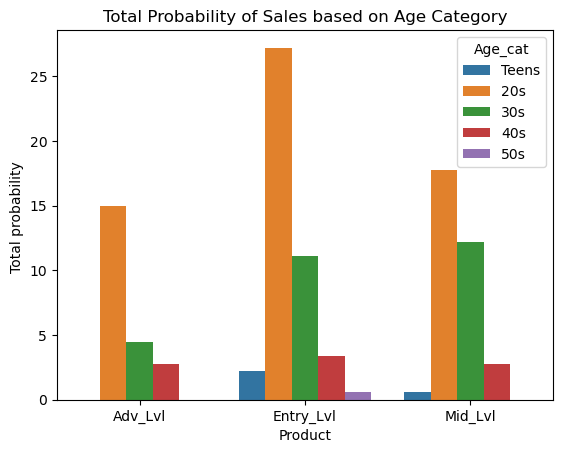

In [303]:
#Probability of Sales based on Age_cat

crsstb_a=pd.crosstab(index=df_new1['Product'],columns=df_new1['Age_cat'],margins=False).reset_index()
prob_mstatus=crsstb_a.iloc[:,1:]/len(df_new1)*100
prob_mstatus
prob_plot_data=pd.concat([crsstb_a['Product'],prob_mstatus],axis=1)
print(prob_plot_data)
print()
prob_plot_data_clean=pd.melt(prob_plot_data,id_vars=['Product'],var_name='Age_cat',value_name='Probability')
prob_plot_data_clean
print(prob_plot_data_clean)
sns.barplot(data=prob_plot_data_clean,x='Product',y='Probability',hue='Age_cat')
plt.title("Total Probability of Sales based on Age Category")
plt.ylabel("Total probability ")
plt.show()


Age_cat    Product     Teens       20s       30s       40s     50s
0          Adv_Lvl  0.000000  0.675000  0.200000  0.125000  0.0000
1        Entry_Lvl  0.050000  0.612500  0.250000  0.075000  0.0125
2          Mid_Lvl  0.016667  0.533333  0.366667  0.083333  0.0000


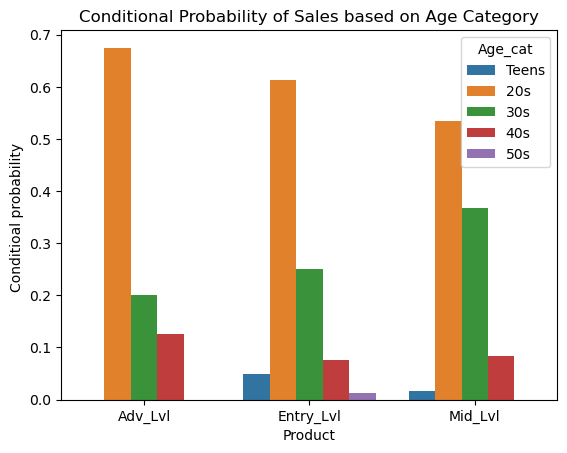

In [304]:
#Conditional prob for each prodcut based on Age_cat status
cond_crsstb_g=pd.crosstab(index=df_new1['Product'],columns=df_new1['Age_cat'],margins=False,margins_name='Total',normalize='index').reset_index()
c_prob_plot_data_clean=pd.melt(cond_crsstb_g,id_vars=['Product'],var_name='Age_cat',value_name='Probability')
c_prob_plot_data_clean
print(cond_crsstb_g)

sns.barplot(data=c_prob_plot_data_clean,x='Product',y='Probability',hue='Age_cat')
plt.title("Conditional Probability of Sales based on Age Category")
plt.ylabel("Conditioal probability ")
plt.show()

In [285]:
#Categorizing based on Salary
bins=[20000,29000,39000,49000,59000,69000,79000,89000,99000,109000]
label=['20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k-90k','90k-100k','100k-110k']
df_new1["Income_cat"]=pd.cut(df_new1["Income"],bins=bins,labels=label)
df_new1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Income_cat
0,Entry_Lvl,18,Male,14,Single,3,4,29562,112,Teens,30k-40k
1,Entry_Lvl,19,Male,15,Single,2,3,31836,75,Teens,30k-40k
2,Entry_Lvl,19,Female,14,Partnered,4,3,30699,66,Teens,30k-40k
3,Entry_Lvl,19,Male,12,Single,3,3,32973,85,Teens,30k-40k
4,Entry_Lvl,20,Male,13,Partnered,4,2,35247,47,20s,30k-40k
...,...,...,...,...,...,...,...,...,...,...,...
175,Adv_Lvl,40,Male,21,Single,6,5,83416,200,40s,80k-90k
176,Adv_Lvl,42,Male,18,Single,5,4,89641,200,40s,90k-100k
177,Adv_Lvl,45,Male,16,Single,5,5,90886,160,40s,90k-100k
178,Adv_Lvl,47,Male,18,Partnered,4,5,104581,120,40s,100k-110k


Income_cat    Product  30k-40k  40k-50k  50k-60k  60k-70k  70k-80k  80k-90k  \
0             Adv_Lvl        0        3        8        5        5        5   
1           Entry_Lvl       21       27       25        7        0        0   
2             Mid_Lvl        9       21       21        9        0        0   

Income_cat  90k-100k  100k-110k  
0                 10          4  
1                  0          0  
2                  0          0  

      Product Income_cat  Probability
0     Adv_Lvl    30k-40k     0.000000
1   Entry_Lvl    30k-40k    11.666667
2     Mid_Lvl    30k-40k     5.000000
3     Adv_Lvl    40k-50k     1.666667
4   Entry_Lvl    40k-50k    15.000000
5     Mid_Lvl    40k-50k    11.666667
6     Adv_Lvl    50k-60k     4.444444
7   Entry_Lvl    50k-60k    13.888889
8     Mid_Lvl    50k-60k    11.666667
9     Adv_Lvl    60k-70k     2.777778
10  Entry_Lvl    60k-70k     3.888889
11    Mid_Lvl    60k-70k     5.000000
12    Adv_Lvl    70k-80k     2.777778
13  Entry_Lvl 

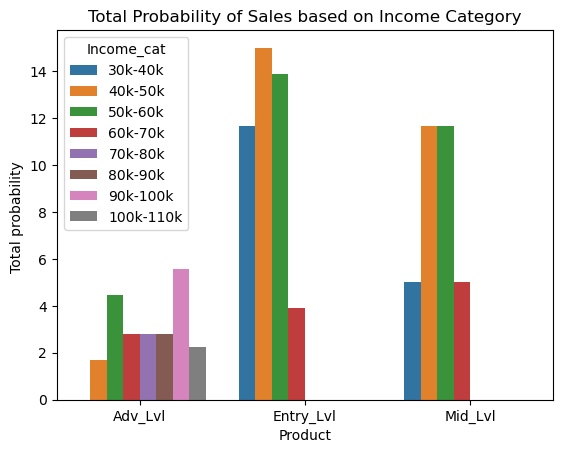

In [306]:
#Probability of Sales based on Age_cat

crsstb_s=pd.crosstab(index=df_new1['Product'],columns=df_new1['Income_cat'],margins=False).reset_index()
prob_mstatus=crsstb_s.iloc[:,1:]/len(df_new1)*100
prob_mstatus
prob_plot_data=pd.concat([crsstb_s['Product'],prob_mstatus],axis=1)
print(crsstb_s)
print()
prob_plot_data_clean=pd.melt(prob_plot_data,id_vars=['Product'],var_name='Income_cat',value_name='Probability')
prob_plot_data_clean
print(prob_plot_data_clean)
sns.barplot(data=prob_plot_data_clean,x='Product',y='Probability',hue='Income_cat')
plt.title("Total Probability of Sales based on Income Category")
plt.ylabel("Total probability ")
plt.show()

Income_cat    Product  30k-40k  40k-50k  50k-60k  60k-70k  70k-80k  80k-90k  \
0             Adv_Lvl   0.0000   0.0750   0.2000   0.1250    0.125    0.125   
1           Entry_Lvl   0.2625   0.3375   0.3125   0.0875    0.000    0.000   
2             Mid_Lvl   0.1500   0.3500   0.3500   0.1500    0.000    0.000   

Income_cat  90k-100k  100k-110k  
0               0.25        0.1  
1               0.00        0.0  
2               0.00        0.0  


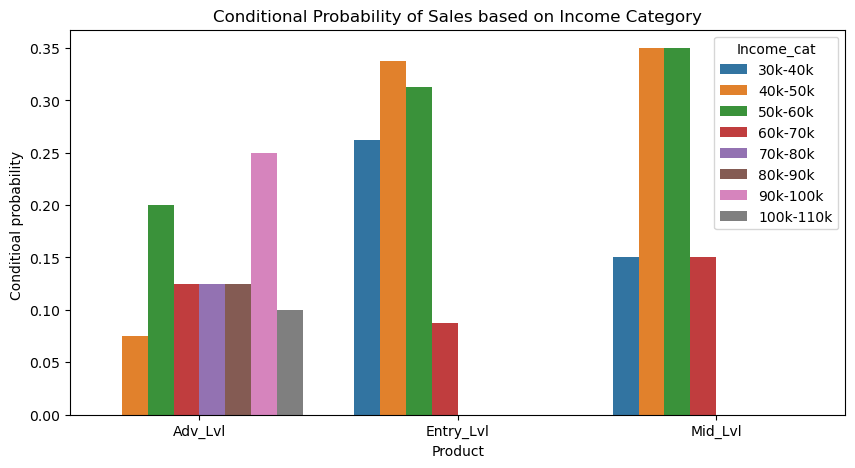

In [305]:
#Conditional prob for each prodcut based on Income category
cond_crsstb_s=pd.crosstab(index=df_new1['Product'],columns=df_new1['Income_cat'],margins=False,margins_name='Total',normalize='index').reset_index()
c_prob_plot_data_clean=pd.melt(cond_crsstb_s,id_vars=['Product'],var_name='Income_cat',value_name='Probability')
c_prob_plot_data_clean
print(cond_crsstb_s)
plt.figure(figsize=(10,5))
sns.barplot(data=c_prob_plot_data_clean,x='Product',y='Probability',hue='Income_cat')
plt.title("Conditional Probability of Sales based on Income Category")
plt.ylabel("Conditioal probability ")
plt.show()

In [308]:
df_new1


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cat,Income_cat
0,Entry_Lvl,18,Male,14,Single,3,4,29562,112,Teens,30k-40k
1,Entry_Lvl,19,Male,15,Single,2,3,31836,75,Teens,30k-40k
2,Entry_Lvl,19,Female,14,Partnered,4,3,30699,66,Teens,30k-40k
3,Entry_Lvl,19,Male,12,Single,3,3,32973,85,Teens,30k-40k
4,Entry_Lvl,20,Male,13,Partnered,4,2,35247,47,20s,30k-40k
...,...,...,...,...,...,...,...,...,...,...,...
175,Adv_Lvl,40,Male,21,Single,6,5,83416,200,40s,80k-90k
176,Adv_Lvl,42,Male,18,Single,5,4,89641,200,40s,90k-100k
177,Adv_Lvl,45,Male,16,Single,5,5,90886,160,40s,90k-100k
178,Adv_Lvl,47,Male,18,Partnered,4,5,104581,120,40s,100k-110k


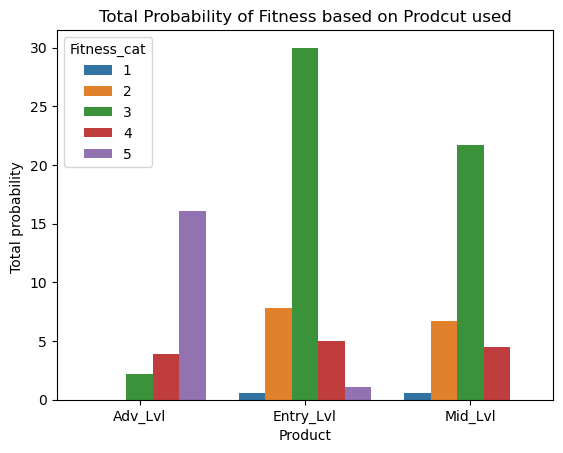

In [309]:
#Probability of Fitness based on product

crsstb_f=pd.crosstab(index=df_new1['Product'],columns=df_new1['Fitness'],margins=False).reset_index()
prob_mstatus=crsstb_f.iloc[:,1:]/len(df_new1)*100
prob_mstatus
prob_plot_data=pd.concat([crsstb_f['Product'],prob_mstatus],axis=1)

prob_plot_data_clean=pd.melt(prob_plot_data,id_vars=['Product'],var_name='Fitness_cat',value_name='Probability')
prob_plot_data_clean

sns.barplot(data=prob_plot_data_clean,x='Product',y='Probability',hue='Fitness_cat')
plt.title("Total Probability of Fitness based on Prodcut used")
plt.ylabel("Total probability ")
plt.show()

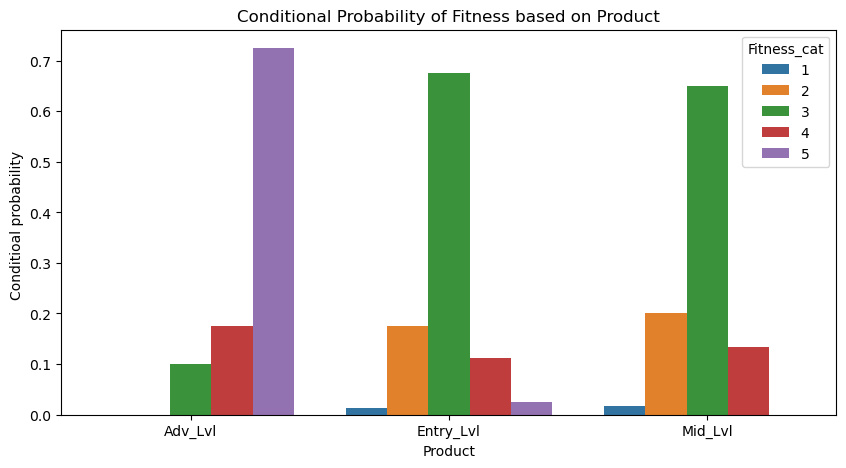

In [290]:
#Conditional prob for fitness based on product
cond_crsstb_s=pd.crosstab(index=df_new1['Product'],columns=df_new1['Fitness'],margins=False,margins_name='Total',normalize='index').reset_index()
c_prob_plot_data_clean=pd.melt(cond_crsstb_s,id_vars=['Product'],var_name='Fitness_cat',value_name='Probability')
c_prob_plot_data_clean

plt.figure(figsize=(10,5))
sns.barplot(data=c_prob_plot_data_clean,x='Product',y='Probability',hue='Fitness_cat')
plt.title("Conditional Probability of Fitness based on Product")
plt.ylabel("Conditioal probability ")
plt.show()